In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('nba-player-stats-2021.csv', encoding='ISO-8859-1')
data.head()

player pos  age   tm   g  gs    mp    fg   fga  fgpercent  ...  \
0   Precious Achiuwa   C   22  TOR  73  28  1725   7.7  17.5      0.439  ...   
1       Steven Adams   C   28  MEM  76  75  1999   5.0   9.2      0.547  ...   
2        Bam Adebayo   C   24  MIA  56  56  1825  11.1  20.0      0.557  ...   
3       Santi Aldama  PF   21  MEM  32   0   360   7.0  17.5      0.402  ...   
4  LaMarcus Aldridge   C   36  BRK  47  12  1050  11.6  21.1      0.550  ...   

    drb   trb  ast  stl  blk  tov   pf   pts   ortg  drtg  
0   9.5  13.7  2.4  1.1  1.2  2.4  4.4  19.2  105.0   110  
1   9.8  18.2  6.1  1.6  1.4  2.8  3.7  12.6  125.0   108  
2  11.7  15.5  5.2  2.2  1.2  4.1  4.7  29.3  117.0   104  
3   7.2  11.6  2.8  0.8  1.3  2.1  4.8  17.5  101.0   111  
4   8.5  11.9  1.9  0.6  2.2  2.0  3.6  28.0  119.0   112  

[5 rows x 30 columns]

### Basic understanding of data

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player      812 non-null    object 
 1   pos         812 non-null    object 
 2   age         812 non-null    int64  
 3   tm          812 non-null    object 
 4   g           812 non-null    int64  
 5   gs          812 non-null    int64  
 6   mp          812 non-null    int64  
 7   fg          812 non-null    float64
 8   fga         812 non-null    float64
 9   fgpercent   797 non-null    float64
 10  x3p         812 non-null    float64
 11  x3pa        812 non-null    float64
 12  x3ppercent  740 non-null    float64
 13  x2p         812 non-null    float64
 14  x2pa        812 non-null    float64
 15  x2ppercent  784 non-null    float64
 16  ft          812 non-null    float64
 17  fta         812 non-null    float64
 18  ftpercent   715 non-null    float64
 19  orb         812 non-null    f

In [4]:
print(data.describe())

              age           g          gs           mp          fg  \
count  812.000000  812.000000  812.000000   812.000000  812.000000   
mean    26.051724   36.705665   16.672414   825.188424    6.935468   
std      4.059640   25.898042   23.817195   775.786331    3.419585   
min     19.000000    1.000000    0.000000     1.000000    0.000000   
25%     23.000000   12.000000    0.000000   121.000000    5.100000   
50%     25.000000   36.500000    4.000000   577.500000    6.850000   
75%     29.000000   61.000000   25.000000  1414.500000    8.600000   
max     41.000000   82.000000   82.000000  2854.000000   49.000000   

              fga   fgpercent         x3p        x3pa  x3ppercent  ...  \
count  812.000000  797.000000  812.000000  812.000000  740.000000  ...   
mean    16.066995    0.434257    2.028695    6.467611    0.303445  ...   
std      5.627889    0.137794    1.573494    4.443072    0.138111  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   

In [5]:
print(f'Duplicate entries: {data.duplicated().sum()}')

Duplicate entries: 0


In [6]:
print(f'Null values: \n{data.isna().sum()}')

Null values: 
player         0
pos            0
age            0
tm             0
g              0
gs             0
mp             0
fg             0
fga            0
fgpercent     15
x3p            0
x3pa           0
x3ppercent    72
x2p            0
x2pa           0
x2ppercent    28
ft             0
fta            0
ftpercent     97
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
pts            0
ortg          10
drtg           0
dtype: int64


In [7]:
data = data.dropna()
data.shape

(672, 30)

## Exploratory Data Analysis (EDA)

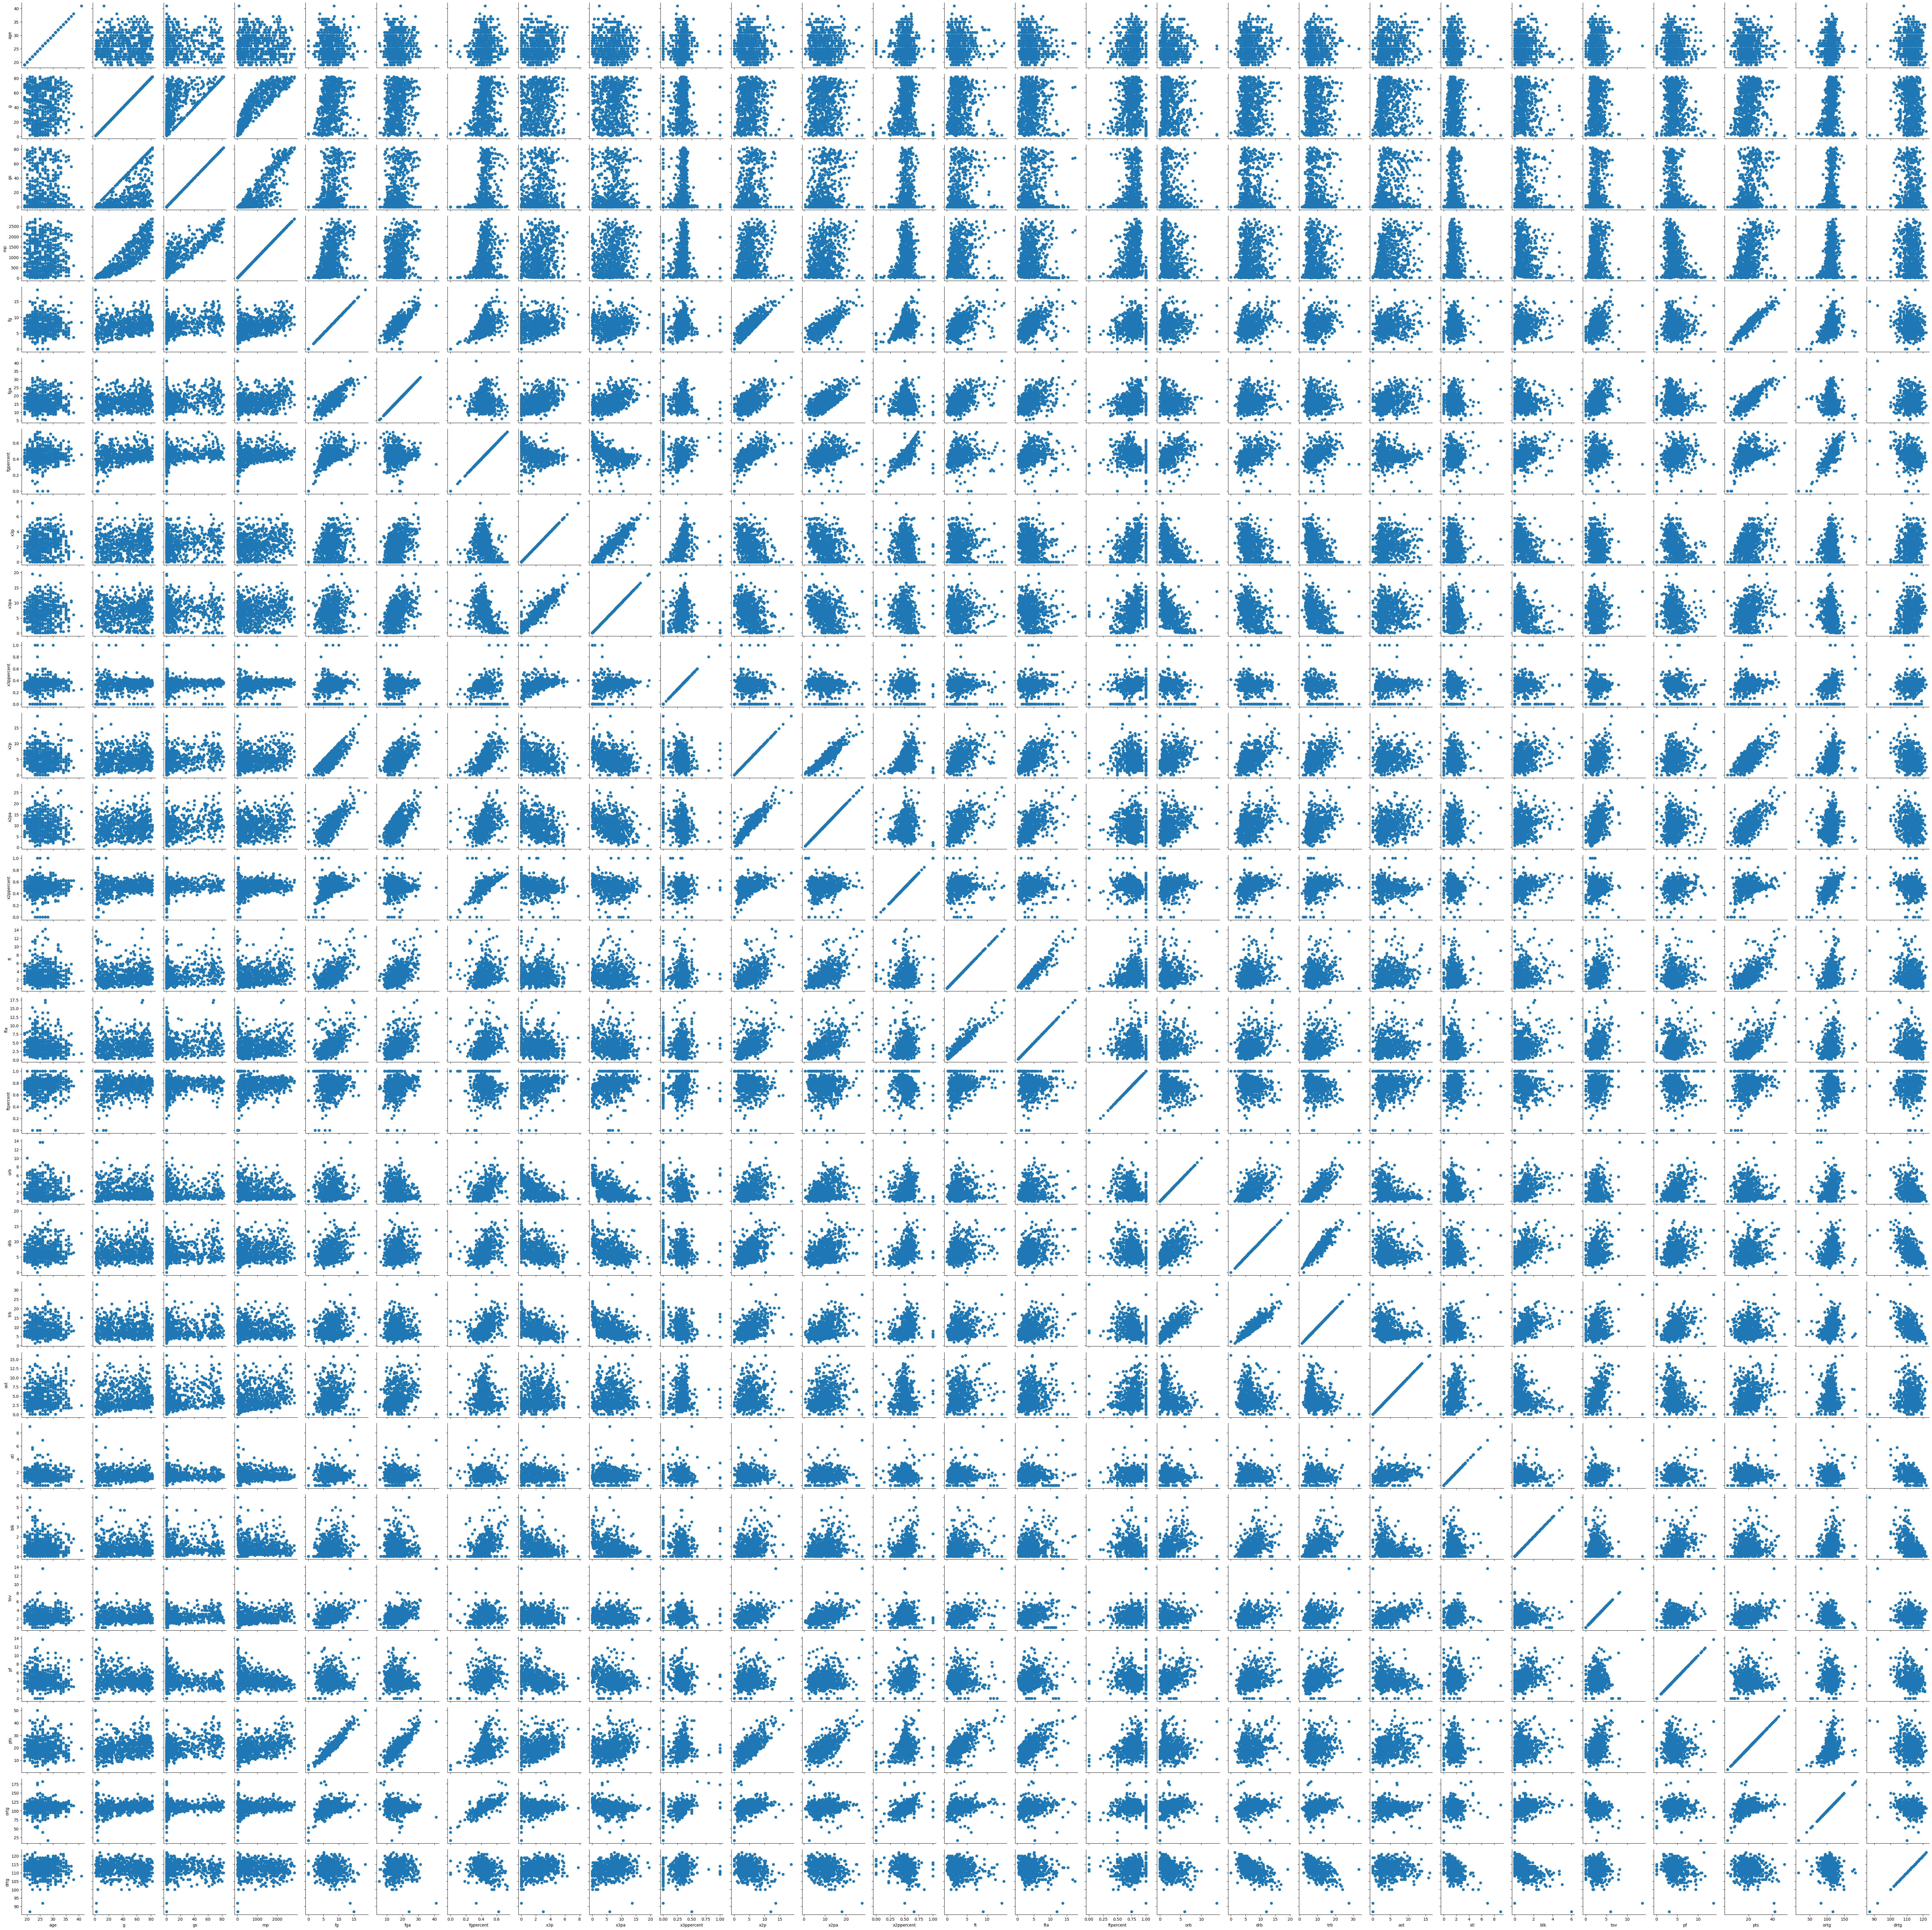

In [8]:
g = sns.PairGrid(data)
g.map(plt.scatter)

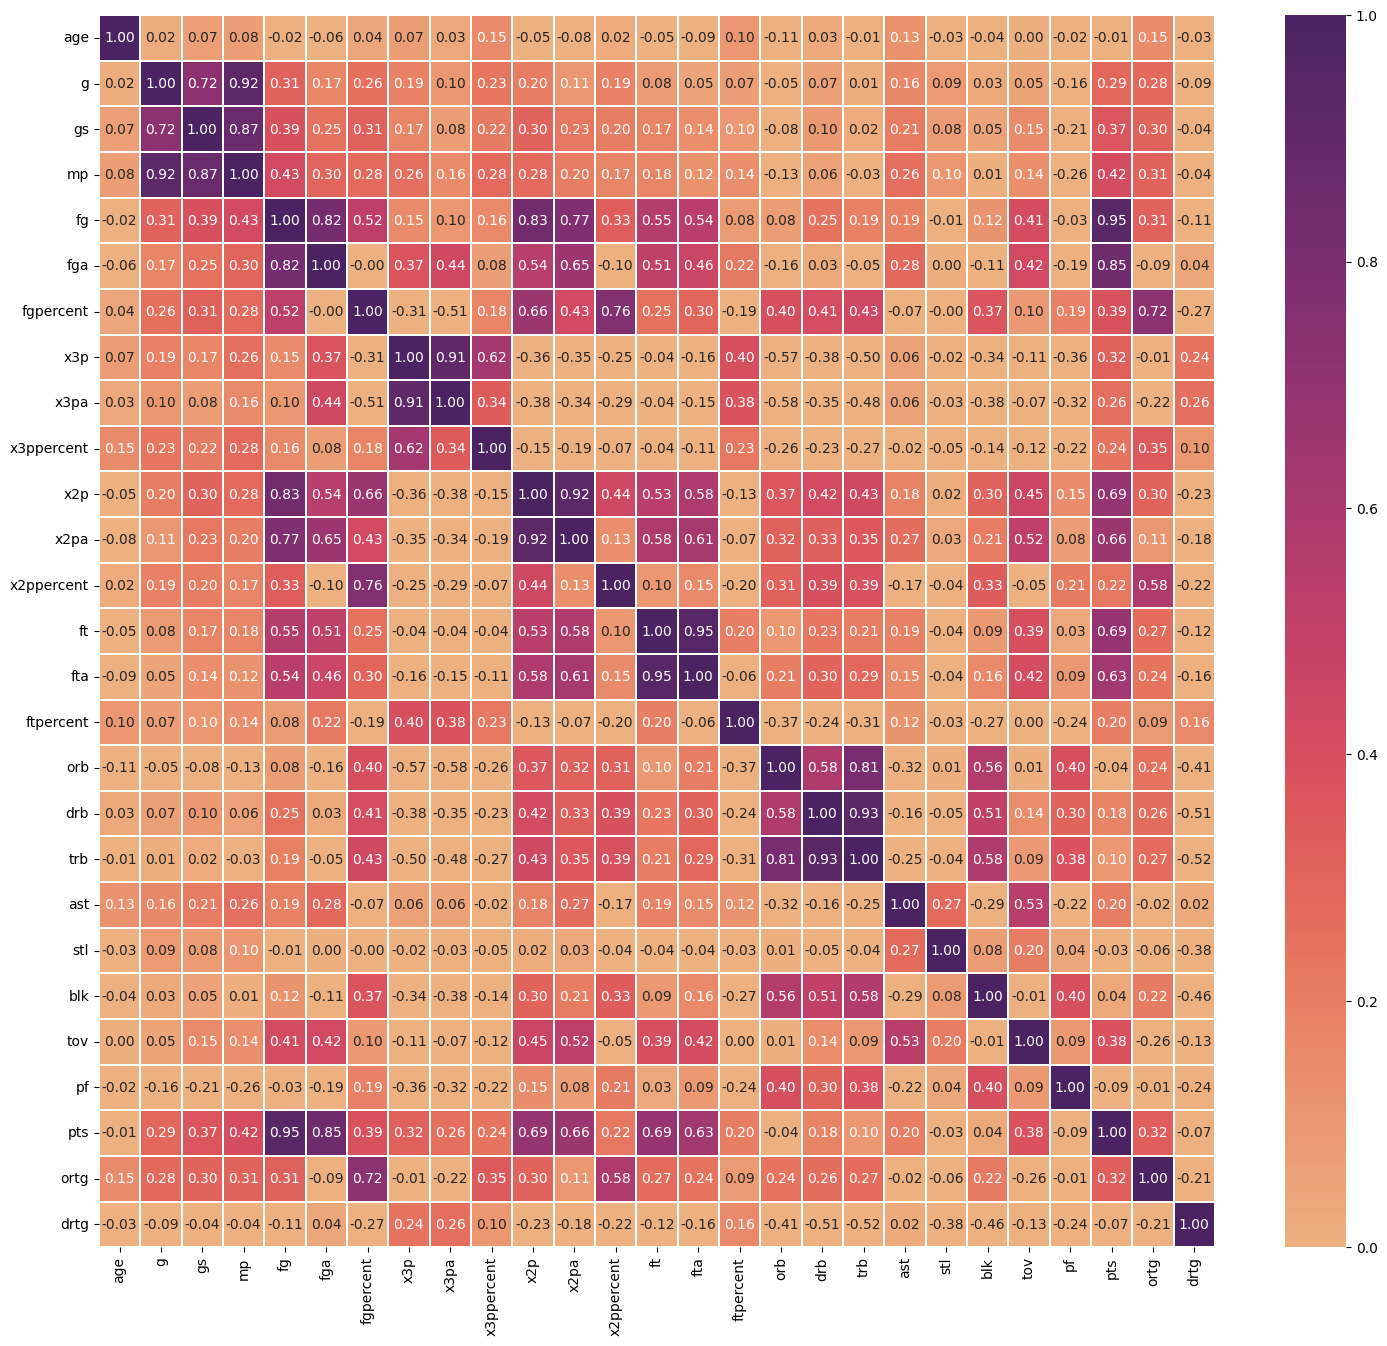

In [9]:
plt.figure(figsize=(18,16))

corr = data.drop(columns=['player', 'pos', 'tm']).corr(method='spearman')
sns.heatmap(corr, annot=True, linewidth=.1, vmin=0, vmax=1,
            fmt=".2f", cmap=sns.color_palette("flare", as_cmap=True))
plt.show()

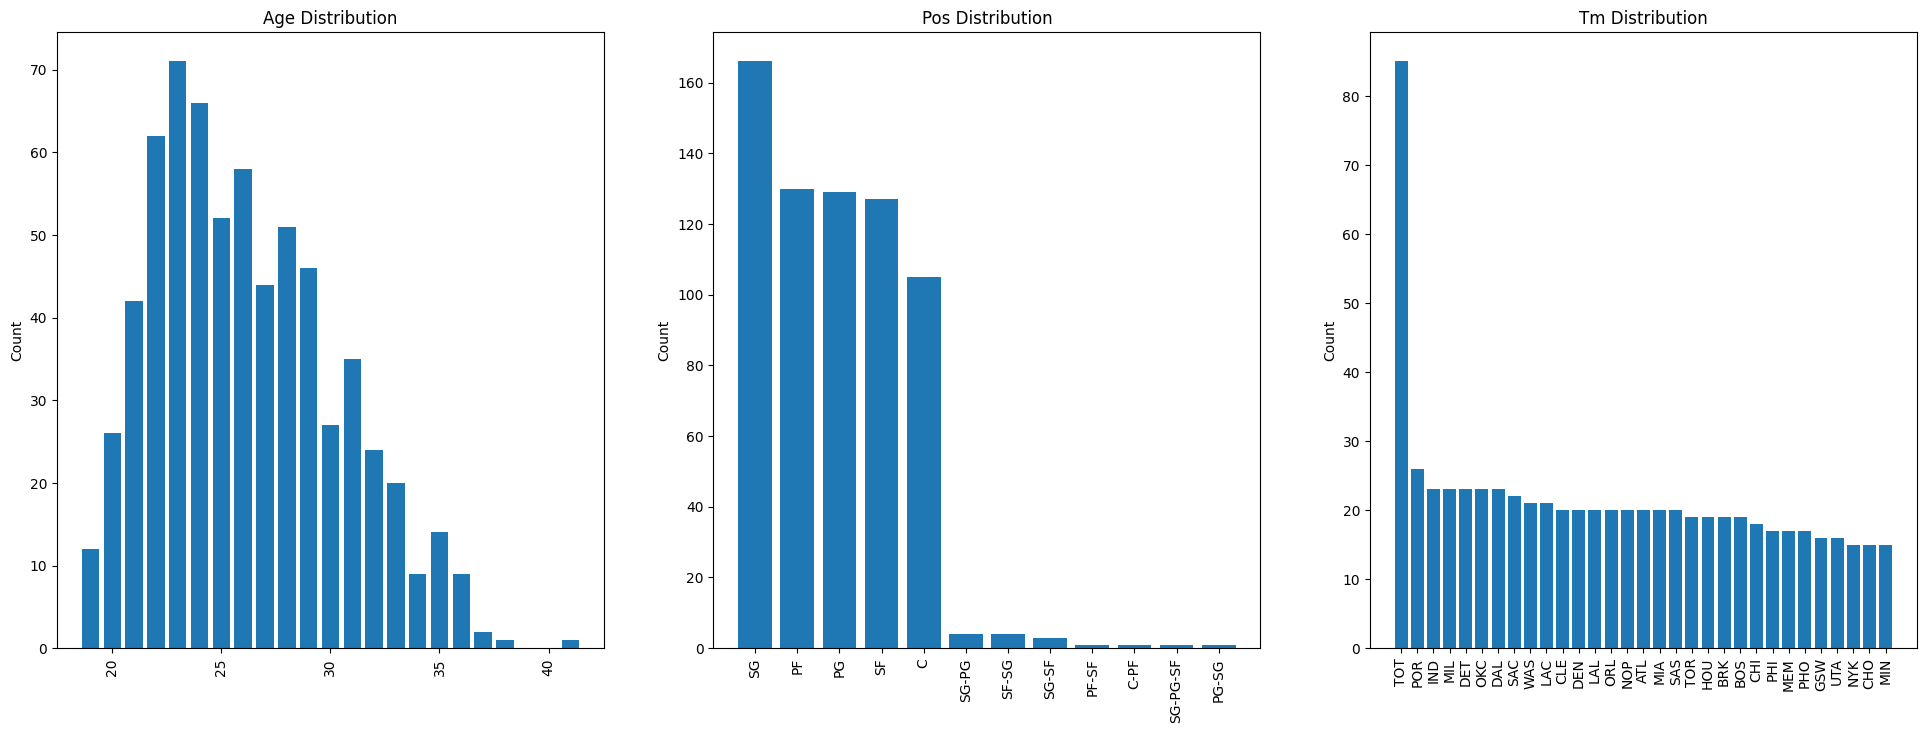

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

variables = ['age', 'pos', 'tm']
for ax, var in zip(axs.flatten(), variables):
    counts = data[var].value_counts()
    
    ax.bar(counts.index, counts.values)
    ax.set_title(f'{var.capitalize()} Distribution')
    ax.set_ylabel('Count')
    #ax.set_xlabel(var.capitalize())
    ax.tick_params(axis='x', rotation=90)

#### Get feature importance for regression

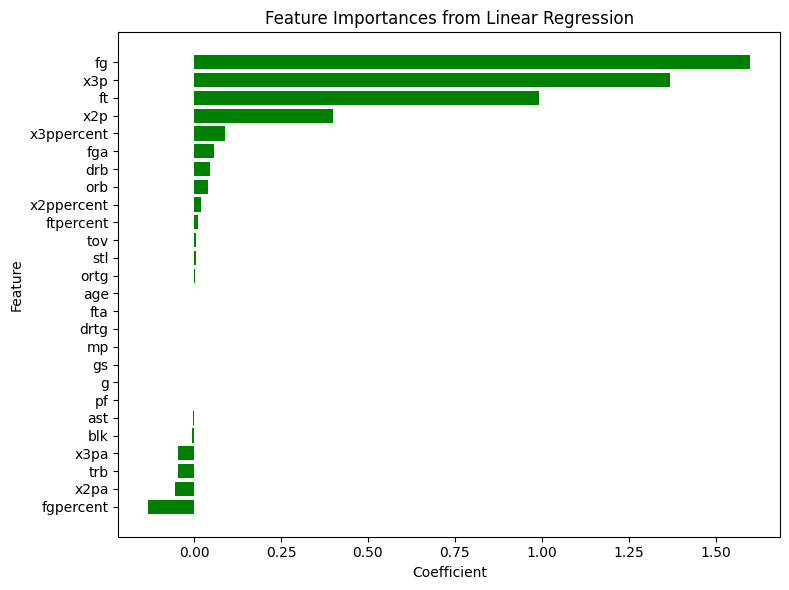

In [11]:
X = data.drop(columns=['player','pos','tm', 'pts']) 
y = data['pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(coefficients['Feature'] ,coefficients['Coefficient'], color = 'green')
plt.title("Feature Importances from Linear Regression")
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Get Feature importance for classification

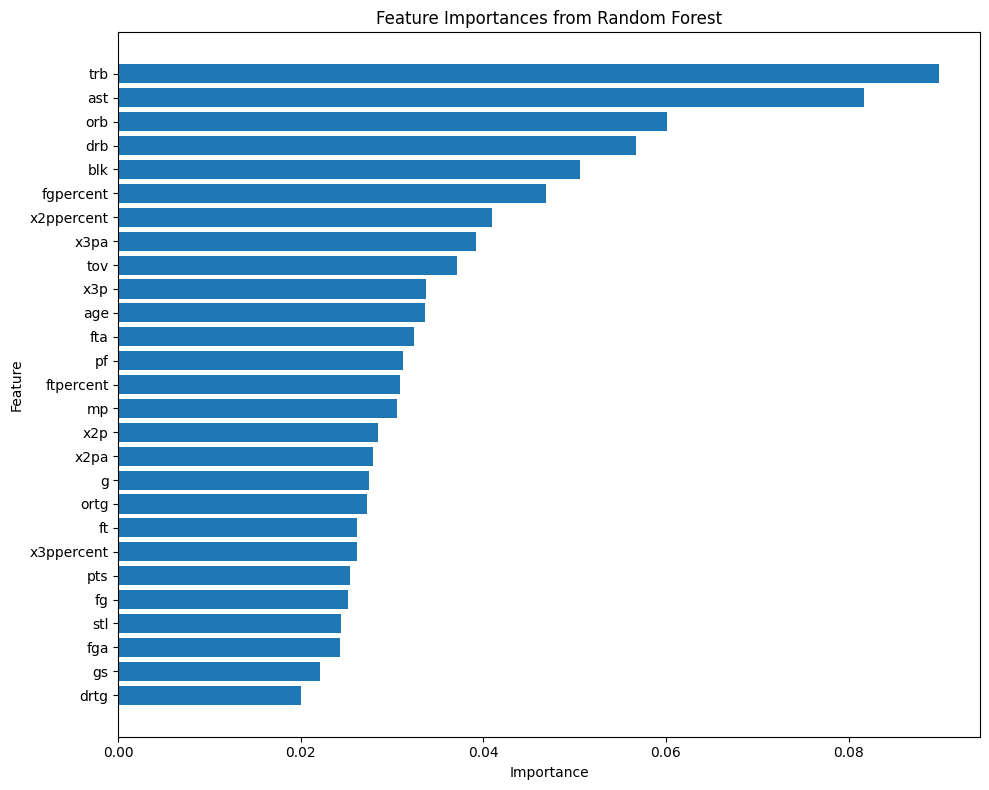

In [12]:
X = data.drop(columns=['player', 'tm', 'pos'])
y = data['pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.barh(importances['Feature'], importances['Importance'] )
plt.title("Feature Importances from Random Forest")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Regression Approach

In [13]:
X = data.drop(columns=['player', 'tm', 'pos', 'pts'])
y = data['pts']

regressors = [
    LinearRegression(),
    SVR(kernel='linear', C=1, gamma=0.1),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for reg in regressors:

    model = make_pipeline(StandardScaler(), reg)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print(f'Classifier: {reg.__class__.__name__}')
    print(f'Test Data Accuracy: {metrics.r2_score(y_test, y_pred)*100:,.2f} \nTest MSE: {metrics.mean_squared_error(y_test, y_pred)}')
    print(f'Train Data Accuracy: {metrics.r2_score(y_train, y_train_pred)*100:,.2f} \nTrain MSE: {metrics.mean_squared_error(y_train,y_train_pred)}')
    print('-' * 60)  

Classifier: LinearRegression
Test Data Accuracy: 99.99 
Test MSE: 0.006392529751849645
Train Data Accuracy: 99.99 
Train MSE: 0.004912558371196139
------------------------------------------------------------
Classifier: SVR
Test Data Accuracy: 99.99 
Test MSE: 0.006916545699072501
Train Data Accuracy: 99.99 
Train MSE: 0.005430518635537504
------------------------------------------------------------
Classifier: RandomForestRegressor
Test Data Accuracy: 94.92 
Test MSE: 2.4192729629629692
Train Data Accuracy: 99.56 
Train MSE: 0.20537497951582878
------------------------------------------------------------
Classifier: DecisionTreeRegressor
Test Data Accuracy: 90.23 
Test MSE: 4.656222222222222
Train Data Accuracy: 100.00 
Train MSE: 0.0
------------------------------------------------------------
Classifier: GradientBoostingRegressor
Test Data Accuracy: 98.21 
Test MSE: 0.8525713702311238
Train Data Accuracy: 99.87 
Train MSE: 0.060731542811477475
---------------------------------------

## Classification Approach

Classifier: LogisticRegression
Test Data Accuracy: 0.56 
F1-Score: 0.46
Train Data Accuracy: 0.61 
F1_score: 0.35

CR:               precision    recall  f1-score   support

           C       0.76      0.76      0.76        25
          PF       0.46      0.45      0.46        29
       PF-SF       0.00      0.00      0.00         1
          PG       0.78      0.70      0.74        30
          SF       0.24      0.26      0.25        19
          SG       0.53      0.58      0.55        31

    accuracy                           0.56       135
   macro avg       0.46      0.46      0.46       135
weighted avg       0.57      0.56      0.56       135



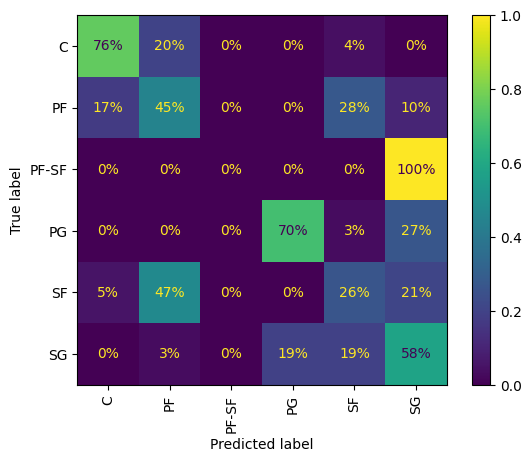

---------------------------------------------------------------------------
Classifier: SVC
Test Data Accuracy: 0.55 
F1-Score: 0.44
Train Data Accuracy: 0.67 
F1_score: 0.48

CR:               precision    recall  f1-score   support

           C       0.74      0.68      0.71        25
          PF       0.46      0.45      0.46        29
       PF-SF       0.00      0.00      0.00         1
          PG       0.72      0.77      0.74        30
          SF       0.19      0.21      0.20        19
          SG       0.55      0.55      0.55        31

    accuracy                           0.55       135
   macro avg       0.44      0.44      0.44       135
weighted avg       0.55      0.55      0.55       135



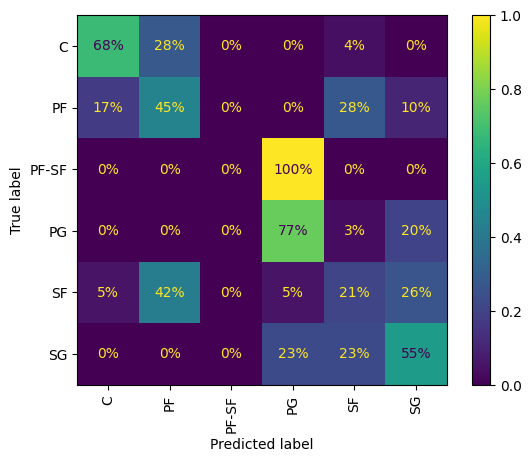

---------------------------------------------------------------------------
Classifier: RandomForestClassifier
Test Data Accuracy: 0.60 
F1-Score: 0.48
Train Data Accuracy: 1.00 
F1_score: 1.00

CR:               precision    recall  f1-score   support

           C       0.67      0.80      0.73        25
          PF       0.47      0.31      0.38        29
       PF-SF       0.00      0.00      0.00         1
          PG       0.79      0.73      0.76        30
          SF       0.33      0.37      0.35        19
          SG       0.62      0.74      0.68        31

    accuracy                           0.60       135
   macro avg       0.48      0.49      0.48       135
weighted avg       0.59      0.60      0.59       135



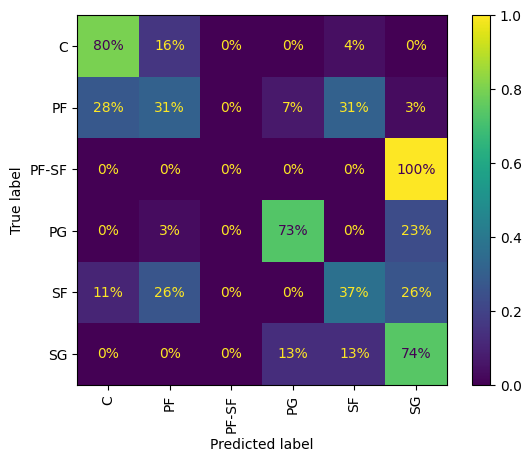

---------------------------------------------------------------------------
Classifier: DecisionTreeClassifier
Test Data Accuracy: 0.50 
F1-Score: 0.26
Train Data Accuracy: 1.00 
F1_score: 1.00

CR:               precision    recall  f1-score   support

           C       0.59      0.64      0.62        25
          PF       0.36      0.31      0.33        29
       PF-SF       0.00      0.00      0.00         1
          PG       0.86      0.60      0.71        30
          SF       0.37      0.37      0.37        19
       SF-SG       0.00      0.00      0.00         0
          SG       0.51      0.58      0.55        31
       SG-PG       0.00      0.00      0.00         0
    SG-PG-SF       0.00      0.00      0.00         0
       SG-SF       0.00      0.00      0.00         0

    accuracy                           0.50       135
   macro avg       0.27      0.25      0.26       135
weighted avg       0.55      0.50      0.52       135



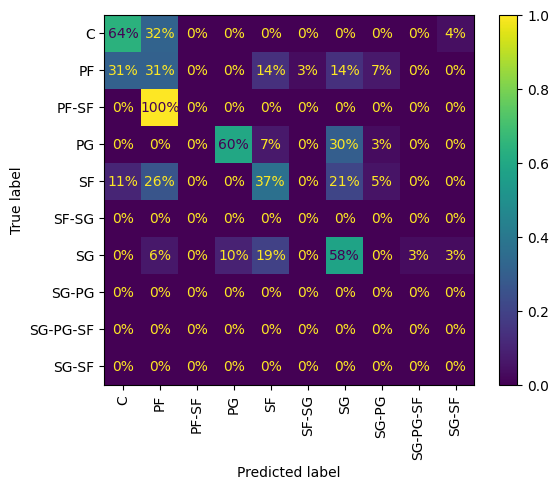

---------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Test Data Accuracy: 0.52 
F1-Score: 0.29
Train Data Accuracy: 1.00 
F1_score: 1.00

CR:               precision    recall  f1-score   support

           C       0.64      0.72      0.68        25
        C-PF       0.00      0.00      0.00         0
          PF       0.39      0.31      0.35        29
       PF-SF       0.00      0.00      0.00         1
          PG       0.81      0.57      0.67        30
          SF       0.26      0.32      0.29        19
          SG       0.54      0.65      0.59        31
       SG-PG       0.00      0.00      0.00         0
       SG-SF       0.00      0.00      0.00         0

    accuracy                           0.52       135
   macro avg       0.29      0.28      0.29       135
weighted avg       0.54      0.52      0.52       135



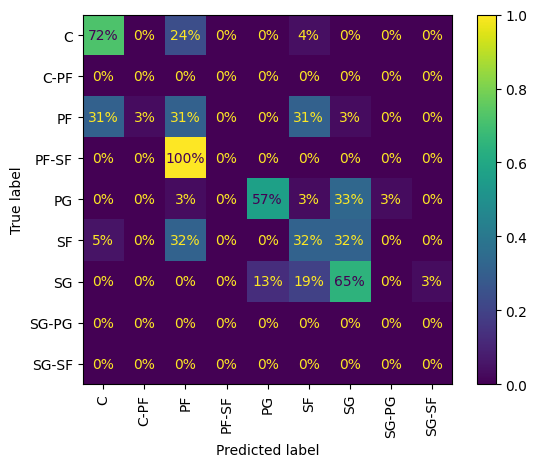

---------------------------------------------------------------------------


In [14]:
X = data.drop(columns=['player', 'tm', 'pos'])
y = data['pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    LogisticRegression(),
    SVC(kernel='linear', C=1, gamma=0.1),
    RandomForestClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(),
    GradientBoostingClassifier()
]

for clf in classifiers:

    model = make_pipeline(StandardScaler(), clf)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    

    print(f'Classifier: {clf.__class__.__name__}')
    print(f"Test Data Accuracy: {metrics.accuracy_score(y_test, y_pred):,.2f} \nF1-Score: {metrics.f1_score(y_test, y_pred, average='macro', zero_division=0):,.2f}")
    print(f'Train Data Accuracy: {metrics.accuracy_score(y_train, y_train_pred):,.2f} \nF1_score: {metrics.f1_score(y_train,y_train_pred, average='macro', zero_division=0):,.2f}\n')
    print(f'CR: {metrics.classification_report(y_test, y_pred, zero_division=0)}')
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                normalize='true',
                                                values_format=".0%",
                                                xticks_rotation='vertical')
    plt.show()
    print('-' * 75)  